# **Figure RAD Treatment**

### Program: 
[Jupyter notebook >=5.5, Python >=3.4]

### Input: 
- individual normalized XANES spectra from 2017 samples, type = .dat, [datasetRAD] ()
> c_2017_MH0169_1a_044_054to058.dat

### Steps:
- follow script below

### Output:
- Figure RAD, type = .svg or .pdf, [FigureRAD] ()
> FigureRAD_date_1 <br>

### Notes:
- all comments are made with '##' 
- aspects that can be changed depending on the sample, etc. are with '#'

### Additional Notes:
- Figure layout and extra labels were accomplished in [Inkscape 0.92.4] (https://inkscape.org/)

In [2]:
%pylab inline
import re
import pandas as pd
import os

Populating the interactive namespace from numpy and matplotlib


In [3]:
##standards for figures
SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
date = datetime.datetime.now().strftime("%Y%m%d")
try:
    os.mkdir('Figure_RAD')
except OSError:
    pass

In [5]:
##enter the figure name here that will be the filename for the image of the figure output below
FIG_name = 'FigureRAD_{}_'.format(date)  ## underscore at end to allow indexing when saving below
FIG_name

'FigureRAD_20190724_'

In [6]:
##function to read in spectra per filename (ie sample)
def read_multi(filename):
    txt = open(filename).read()
    starts = []
    for match in re.finditer(r'#S', txt, re.DOTALL | re.MULTILINE):
        starts.append(match.start())
    
    starts.append(len(txt))
    parts = []

    for start, stop in zip(starts[:-1], starts[1:]):
        parts.append( array(([ [float(x) for x in line.split()] for line in (txt[start:stop-1].splitlines()[4:]) ])) )

    parts = array(parts)   

    return parts

In [7]:
filename = 'c_2017_MH0169_1a_044_054to058.dat'
filename = os.path.join('dataset_RAD', filename)

In [8]:
##preparation for saving
basename, ext = os.path.splitext(filename)
savename = basename[0:-12]
savename

'dataset_RAD\\c_2017_MH0169_1a_'

In [9]:
initial = filename[:-4].split('_')[-2]
scans = filename[:-4].split('_')[-1]
start = scans[:3]
stop = scans[5:]
initial, start, stop

('044', '054', '058')

In [10]:
##preparation for plotting
first, last = [int(x) for x in (start, stop)]
scans = [ '{}'.format(x).zfill(3) for x in range(first, last+1) ]
columns = ['energy'] + ['s{}'.format(initial)] + ['s{}'.format(x) for x in scans]
columns

['energy', 's044', 's054', 's055', 's056', 's057', 's058']

In [11]:
##reading in file
parts = read_multi(filename)
c_[parts[0,:,0], parts[:,:,1].T].shape

(350, 7)

In [12]:
print(len(columns))
print(parts.shape) ##(number of spectra, number of signals measured, number of points per signal measured(x,y))

7
(6, 350, 2)


In [13]:
##checks to make sure all have the same x-values; output should be 0
parts[:,:,0].ptp(0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [14]:
##puts spectra into dataframe with spectra #s as column names

##if cell above outputs all 0s, then all x-values (ie. energies recorded) are equivalent
##for plotting, need only one energy axis from any spectrum
##defining an array of energy values
x = parts[0, :, 0]*1000 ##energies, in eV
x.shape

##defining an array of intensity values for all spectra
y = parts[:,:,1].T
y.shape

df = pd.DataFrame(c_[x, y], columns=columns)
df

,energy,s044,s054,s055,s056,s057,s058
0,2460.09,-0.001233,-0.005426,0.001057,-0.006428,-0.005283,-0.002050
1,2460.28,-0.004122,-0.004123,-0.002899,-0.006158,-0.002679,-0.005184
2,2460.47,-0.002438,-0.003403,-0.005293,-0.003149,-0.001055,-0.002480
3,2460.66,-0.002694,-0.004329,-0.004604,-0.004247,-0.005455,-0.001169
4,2460.85,-0.003543,-0.000497,-0.002338,-0.001955,-0.004959,-0.005834
5,2461.04,-0.001888,-0.005638,0.000873,-0.001340,-0.005126,-0.001056
6,2461.23,-0.001759,-0.004507,-0.001273,0.000209,-0.005396,-0.005051
7,2461.42,-0.003345,0.000031,-0.002237,-0.000979,-0.001834,-0.002459
8,2461.61,-0.003766,-0.005681,-0.001988,-0.002895,-0.003852,-0.002555
9,2461.80,-0.004250,-0.002470,-0.001333,-0.002917,-0.005350,-0.000134


In [15]:
##making dataframes for plotting
x_plot = df[['energy']]
y_plot = df.iloc[:,1:25]

In [16]:
##standards for publication figures

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

s=100
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

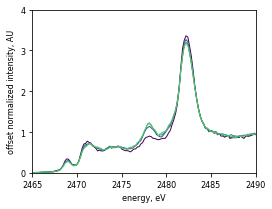

In [18]:
figsize(4,3)

spec_num = 5
color = iter(cm.viridis(np.linspace(0,1.0,spec_num))) #assigning the colormap type to be iterated over the number of columns

for n in range (1, spec_num):
    my_c = next(color)
    water = plt.plot(df.iloc[:,0], df.iloc[:,n], c = my_c, linewidth = 1) 
    
    #cm... is the name of the colormap; putting '_r' after this reverses the order
    #linspace(X,Y,n), the X,X is range of colors through which your n plots will step through
        #colormaps I like: seismic, jet, CMRmap, ocean, terrain, gist_earth, gnuplot2, winter
        #see: https://matplotlib.org/examples/color/colormaps_reference.html

plt.ylabel('offset normalized intensity, AU')
plt.xlabel('energy, eV')
plt.xlim(2465,2490)   #not needed if subsample data above
plt.ylim(0,4)
xticks(np.arange(2465,2490.001, step=5))
yticks(np.arange(0,4.001, step=1))

##saving figure as a tif with index so can change formatting of colors etc without overwriting
savefmt = os.path.join('Figure_RAD',
                       '{}{{:d}}.{{}}'.format(FIG_name))
i = 1
while os.path.exists(savefmt.format(i,'tif')):
    i += 1
plt.savefig(savefmt.format(i,'tif'), bbox_inches = 'tight')
plt.savefig(savefmt.format(i,'pdf'), bbox_inches = 'tight')
plt.savefig(savefmt.format(i,'svg'), bbox_inches = 'tight')

plt.show()

### end